# 최적 정규화
- 알파 최적화 문제

## 오차-분산 트레이드오프

모형 최적화 뒤의 편향 오차(bias)와 오차 분산(variance)는 다음과 같은 트레이드-오프(trade-off) 관계를 가진다. 즉, 어느 하나가 작아지면 다른 하나는 커지게 된다.
* 이 방식 잘 안 쓴다. 안 쓰는 이유는 분산과 바이어스를 또 얼만큼 맞춰야 하는지 기준을 정해야 하기 때문


함수 $f$를 다른 함수 $\hat{f}$로 모사(approximation)할 때 오차를 $\epsilon$이라고 하면

$$
y = f + \epsilon \approx \hat{f}
$$

이다. 이때 

$$\text{E}[y] = \text{E}[f + \epsilon] = \text{E}[f] = f$$


편향 오차(bias)는 다음과 같이 정의한다.
$$
\begin{align}
 \text{Bias}[\hat{f}] =  f - \text{E}[\hat{f}] 
\end{align}
$$


오차의 분산(Variance)은 다음과 같이 정의한다.
$$
\begin{align}
\text{Var}[\hat{f}] = \text{E}[ ( \hat{f} - \text{E}[\hat{f}])^2 ] 
\end{align}
$$

이 때 편향 오차와 오차 분산은 다음과 같은 관계가 성립하므로 동시에 줄일 수 없다.

$$
\begin{align}
\text{E}[(y - \hat{f})^2]
 & = (\text{Bias}[\hat{f}(x)])^2 + \text{Var}[\hat{f}(x)] + \text{Var}[\epsilon] \\
\end{align}
$$


<img src="https://datascienceschool.net/upfiles/c1d938635778456d9ccc94d9fbf59e22.png">

(증명)






$$
\begin{align}
\text{Var}[y] 
&= \text{E}[(y - \text{E}[y])^2] \\
&= \text{E}[(y - f)^2] \\
&= \text{E}[(f + \epsilon - f)^2] \\
&= \text{E}[\epsilon^2] \\
&= \text{Var}[\epsilon] 
\end{align}
$$


$$
\begin{align}
\text{E}\big[(y - \hat{f})^2\big]
 & = \text{E}[y^2] + \text{E}[\hat{f}^2] - \text{E}[2y\hat{f}] \\
 & = \text{Var}[y] + \text{E}[y]^2 + \text{Var}[\hat{f}] + \text{E}[\hat{f}]^2 - 2\text{E}[y\hat{f}] \\
 & = \text{Var}[y] + f^2 + \text{Var}[\hat{f}] + \text{E}[\hat{f}]^2 - 2f\text{E}[\hat{f}] \\
 & = \text{Var}[y] + \text{Var}[\hat{f}] + f^2 - 2f\text{E}[\hat{f}]  + \text{E}[\hat{f}]^2 \\
 & = \text{Var}[y] + \text{Var}[\hat{f}] + (f - \text{E}[\hat{f}])^2 \\
 & = \text{Var}[y] + \text{Var}[\hat{f}] + (\text{Bias}[\hat{f}])^2 \\
\end{align}
$$


다항회귀에서 차수를 바꾸어가면서 오차와 분산을 측정하면 다음과 같다.

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score

In [2]:
n_samples = 1000
np.random.seed(0)
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1
X = X[:, np.newaxis]
K = 100

In [3]:
def cv_mse(degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
    scores = -cross_val_score(model, X, y, "mean_squared_error", cv=K)
    return scores

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


0.0130824469849 0.00760649444156


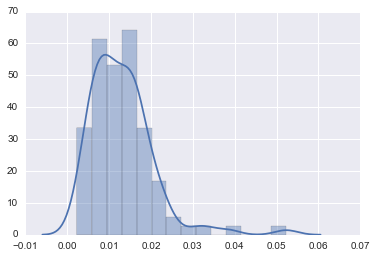

In [4]:
scores1 = cv_mse(3)
sns.distplot(scores1)
print(scores1.mean(), scores1.std())

In [5]:
D = 9
degrees = 2**np.arange(D)
all_scores = np.zeros((K, D))
for i, d in enumerate(degrees):
    scores = cv_mse(d)
    all_scores[:, i] = scores
df = pd.DataFrame(-np.log(all_scores), columns=degrees)
df.describe()

,1,2,4,8,16,32,64,128,256
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.152711,3.431163,4.735579,4.757005,4.746504,4.659983,4.559175,4.512594,4.441795
std,1.197341,0.801431,0.470647,0.464274,0.481903,0.739348,1.275756,1.808795,2.606745
min,-0.143751,1.023711,3.757597,3.746899,3.703365,-0.856708,-6.671090,-12.437759,-20.867744
25%,1.283354,2.877161,4.449526,4.447033,4.426598,4.391713,4.295227,4.302228,4.337584
50%,1.912740,3.341536,4.659961,4.698884,4.686886,4.666861,4.680540,4.677861,4.668288
75%,2.922163,3.963974,5.023880,5.012029,5.031434,5.038455,5.018691,5.033968,5.017724
max,5.195028,5.061568,6.386555,6.284238,6.139298,6.341243,5.910423,6.526446,6.390526


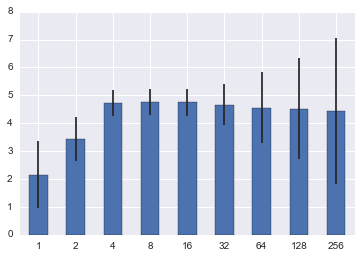

In [6]:
df.mean().plot(kind="bar", rot=0, yerr=df.std())
plt.show()

- 막대그래프에서...다항식의 경우
 * 스코어가 높을수록 좋은 것이다. 밑에 차수는 회귀분석 차수. 막대 높이는 평균 점수
 * 흔들림은 검은 선. 웨이트. 바이오스라고 함. 점점 커지는 것을 오버피팅이라고 한다. 일반적으로 일어나는 현상.
 * r스퀘어의 경우에는 계속해서 평균값이 올라간다. 그러나 조정하면 내려가게 된다. 제한조건을 주면 내려가게 되는 것이다.

## 하이퍼 모수 최적화

하이퍼 모수가 바뀌는 경우에도 마찬가지로 오차-분산 트레이드오프가 성립하므로 최적의 하이퍼 모수를 찾는 작업이 필요하다.

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.cross_validation import cross_val_score

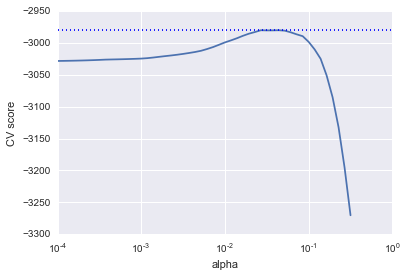

In [10]:
data = load_diabetes()
X = data.data[:200]
y = data.target[:200]
#Lasso로 해보겠다.
model = Lasso()
alphas = np.logspace(-4, -.5, 50)

scores = list()

for alpha in alphas:
    model.alpha = alpha
    this_scores = cross_val_score(model, X, y, "mean_squared_error", cv=5)
    scores.append(np.mean(this_scores))

plt.semilogx(alphas, scores)
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle=':')
plt.show()

그래프가 저렇게 내려오지 않는 경우는? 오버피팅이 일어나지 않는 경우다. 그래서 굳이 정규화하지 않아도 된다.

0.0439397056076


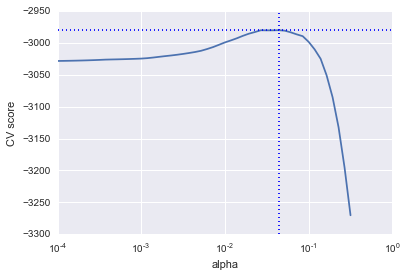

In [11]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, -.5, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X, y)

print(lasso_cv.alpha_ )

scores = -lasso_cv.mse_path_.mean(axis=1)
plt.semilogx(lasso_cv.alphas_, scores)
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(lasso_cv.alpha_ , linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

## One Standard Error Rule

실제로 하이퍼 모수 값을 변경해가면서 최적 값은 오차가 존재하는 부정확한 값이다. 이러한 오차를 고려해서 표준 편차(1 standard deviation)  정도의 오차는 감수하더라도 더 단순한(정규화 모형에서는 더 제약 조건이 강한) 모형을 선택하는 것이 실용적이다.


- 기존의 방법은 CV했을 때 오차가 있는데 그 오차가 크기 때문에 진짜로 optimal이라는 보장이 없다. 
- 이왕이면 오차가 있더라도 정규화 된 것을 원한다. 똑같은 값이면 정규화 된 것을 선호한다. 그래서 오른쪽 값을 보는데 너무 떨어졌다. 원래의 값과 비슷해야 고를 수 있는데. 아까 정한 최적화 점에서 원 스탠다드 디비제이션 움직인만큼 이동한 것을 고르자. 그래서 사실은 0.04가 아니라 좀 더 큰 숫자를 고르자.
- 그런데 이 방법 또한 현업에서 쓰는 하나의 방법일 뿐이다. 하지만 실제로는 분산이 너무 크다. 그래서 원 스탠다드로 쓰기에 적합하지가 않은 경우가 나올 수도 있다.

0.117876863479


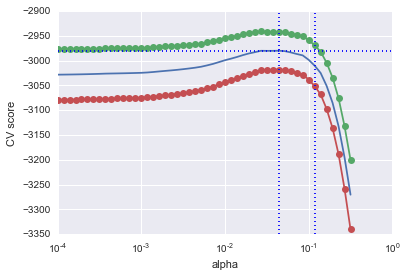

In [12]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, -.5, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X, y)

scores = -lasso_cv.mse_path_.mean(axis=1)
scores_std = lasso_cv.mse_path_.std(axis=1)
scores_std1 = scores + scores_std / np.sqrt(len(lasso_cv.mse_path_))
scores_std2 = scores - scores_std / np.sqrt(len(lasso_cv.mse_path_))

alpha_1se = lasso_cv.alphas_[np.argmax(scores_std1 > np.max(scores))]
print(alpha_1se)

plt.semilogx(lasso_cv.alphas_, scores)
plt.semilogx(lasso_cv.alphas_, scores_std1, 'o-')
plt.semilogx(lasso_cv.alphas_, scores_std2, 'o-')
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(lasso_cv.alpha_ , linestyle=':')   
plt.axvline(alpha_1se, linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()